# Titanic Survival Prediction
* Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
* The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

Dataset: [dataset.csv](https://www.kaggle.com/datasets/yasserh/titanic-dataset)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/Harsh/Task 1/Titanic-Dataset.csv'

df = pd.read_csv(path)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
rows, cols = df.shape
print(f"rows={rows} and cols={cols}")

rows=891 and cols=12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


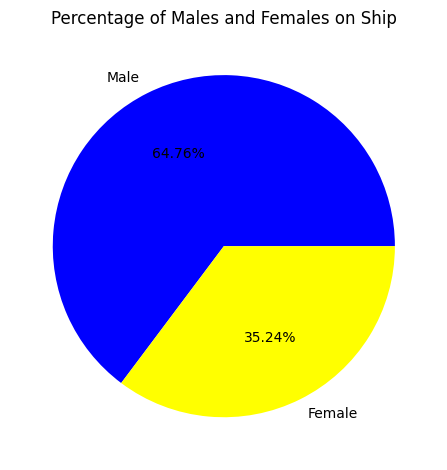

In [ ]:
import matplotlib.pyplot as plt

plt.pie(df['Sex'].value_counts(), colors=['blue', 'yellow'], labels=['Male', 'Female'], autopct='%1.2f%%')
plt.title('Percentage of Males and Females on Ship')
plt.tight_layout()
plt.show()

In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [ ]:
df.Embarked.value_counts()

,count
Embarked,
1,646
2,168
3,77


In [ ]:
result = df.groupby('Pclass').agg(male=('Sex', lambda x: (x == 1).sum()), female=('Sex', lambda x: (x == 0).sum()), embarked=('Embarked', 'count')).reset_index()
print(result)

   Pclass  male  female  embarked
0       1   122      94       216
1       2   108      76       184
2       3   347     144       491


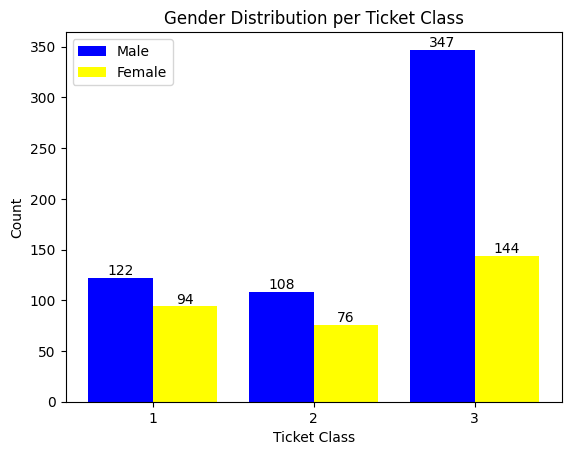

In [ ]:
import numpy as np

indices = np.arange(len(result['Pclass']))
male_plot = plt.bar(indices - 0.2, result['male'], width=0.4, label='Male', color='blue')
female_plot = plt.bar(indices + 0.2, result['female'], width=0.4, label='Female', color='yellow')

plt.xticks(indices, result['Pclass'])
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.title('Gender Distribution per Ticket Class')
plt.legend()

for group in [male_plot, female_plot]:
    for bar in group:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

plt.show()

In [ ]:
print(df.corr())

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.331339  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.084153 -0.114631   
Age             0.033207 -0.069809 -0.331339  0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.091566  0.159651   
Embarked       -0.030467  0.106811  0.045702 -0.116569  0.007461 -0.059961   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030467  
Survived     0.081629  0.257307  0.106811  
Pclass       0.018443 -0.549500  0.045702  
Sex         -0.245489 -0.182333 -0.116569  

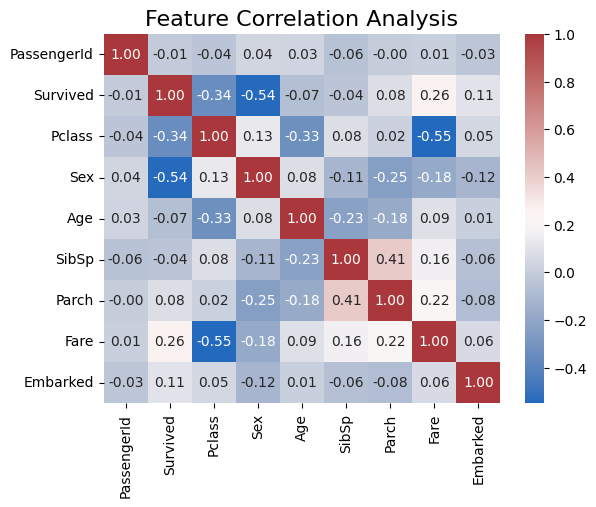

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt=".2f")
plt.title('Feature Correlation Analysis', fontsize=16)
plt.show()

In [ ]:
result_grouped = df.groupby('Pclass').agg(
    male_count=('Sex', lambda x: (x == 1).sum()),
    male_survival=('Survived', lambda x: ((x == 1) & (df['Sex'] == 1)).sum()),
    female_count=('Sex', lambda x: (x == 0).sum()),
    female_survival=('Survived', lambda x: ((x == 1) & (df['Sex'] == 0)).sum()),
    total_embarked=('Embarked', 'count'),
    survived_at_embarked=('Survived', lambda x: (x == 1).sum())
).reset_index()

print(result_grouped)

   Pclass  male_count  male_survival  female_count  female_survival  \
0       1         122             45            94               91   
1       2         108             17            76               70   
2       3         347             47           144               72   

   total_embarked  survived_at_embarked  
0             216                   136  
1             184                    87  
2             491                   119  


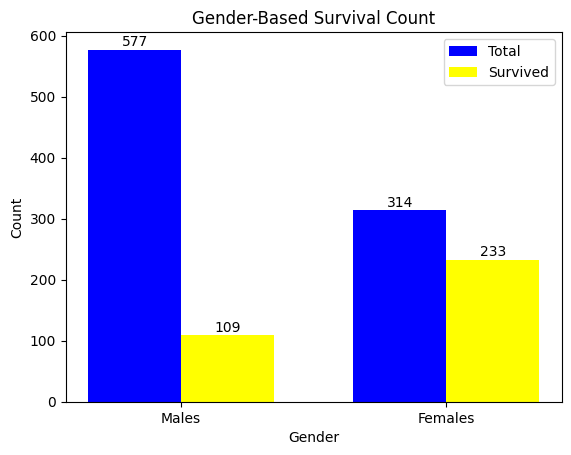

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

summary = {
    'males_total': (df['Sex'] == 1).sum(),
    'males_survived': ((df['Sex'] == 1) & (df['Survived'] == 1)).sum(),
    'females_total': (df['Sex'] == 0).sum(),
    'females_survived': ((df['Sex'] == 0) & (df['Survived'] == 1)).sum()
}

categories = ['Males', 'Females']
survived = [summary['males_survived'], summary['females_survived']]
totals = [summary['males_total'], summary['females_total']]
positions = np.arange(len(categories))
bar_width = 0.35

total_bar = plt.bar(positions - bar_width / 2, totals, width=bar_width, label='Total', color='blue')
survived_bar = plt.bar(positions + bar_width / 2, survived, width=bar_width, label='Survived', color='yellow')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender-Based Survival Count')
plt.xticks(positions, categories)
plt.legend()

for bar_set in [total_bar, survived_bar]:
    for bar in bar_set:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            str(int(bar.get_height())),
            ha='center',
            va='bottom',
            color='black'
        )

plt.show()

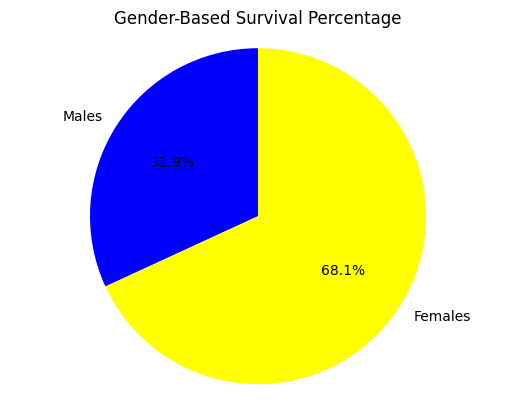

In [ ]:
gender_labels = ['Males', 'Females']
survival_counts = [summary['males_survived'], summary['females_survived']]
pie_colors = ['blue', 'yellow']

plt.pie(survival_counts, labels=gender_labels, autopct='%1.1f%%', colors=pie_colors, startangle=90)

plt.title("Gender-Based Survival Percentage")
plt.axis('equal')
plt.show()

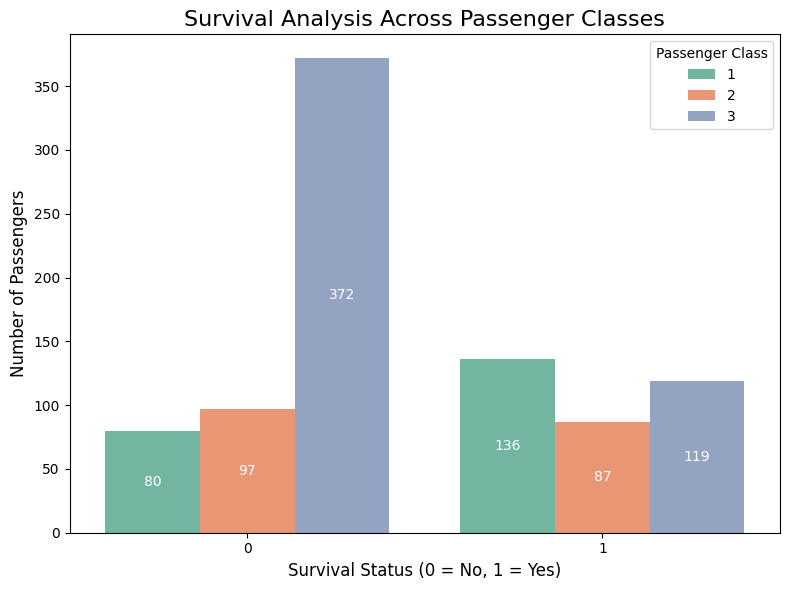

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x='Survived',
    hue='Pclass',
    data=df,
    palette='Set2',
    dodge=True
)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=10, color='white')

plt.title("Survival Analysis Across Passenger Classes", fontsize=16)
plt.xlabel("Survival Status (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)

plt.legend(title="Passenger Class", loc="best", fontsize=10)

plt.tight_layout()

plt.show()

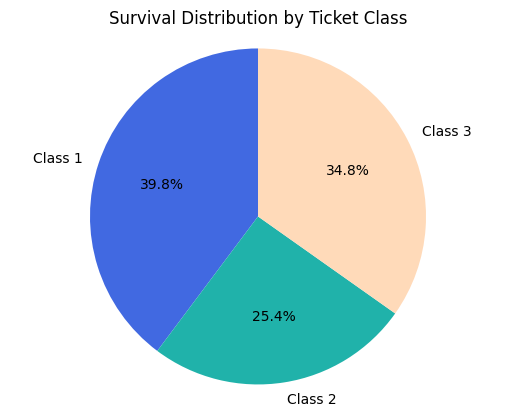

In [ ]:
class_survival = df.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')

survivor_data = class_survival[class_survival['Survived'] == 1]
class_labels = ['Class 1', 'Class 2', 'Class 3']
survival_sizes = survivor_data['Count']
pie_colors = ['royalblue', 'lightseagreen', 'peachpuff']

plt.pie(survival_sizes, labels=class_labels, autopct='%1.1f%%', colors=pie_colors, startangle=90)
plt.title("Survival Distribution by Ticket Class")
plt.axis("equal")
plt.show()

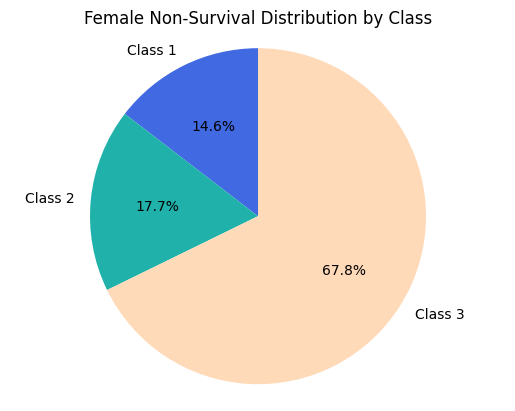

In [ ]:
non_survivor_data = df.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')
females_non_survived = non_survivor_data[non_survivor_data['Survived'] == 0]

class_names = ['Class 1', 'Class 2', 'Class 3']
class_counts = females_non_survived['Count']
color_scheme = ['royalblue', 'lightseagreen', 'peachpuff']

plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', colors=color_scheme, startangle=90)
plt.title("Female Non-Survival Distribution by Class")
plt.axis("equal")
plt.show()

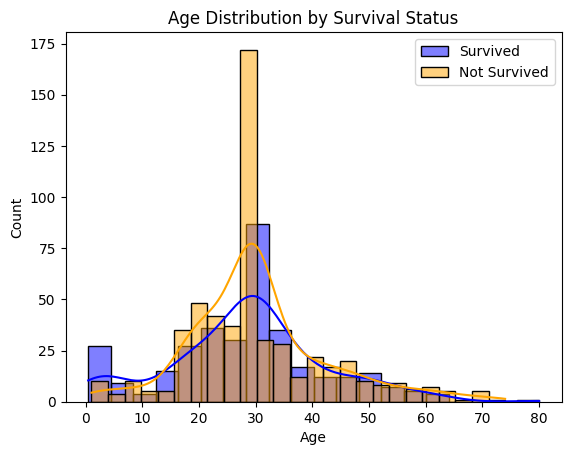

In [ ]:
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='blue', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='orange', label='Not Survived')
plt.legend()
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,1,22.0,7.2500,1,1,0
1,2,1,1,0,38.0,71.2833,2,1,0
2,3,1,3,0,26.0,7.9250,1,0,1
3,4,1,1,0,35.0,53.1000,1,1,0
4,5,0,3,1,35.0,8.0500,1,0,1


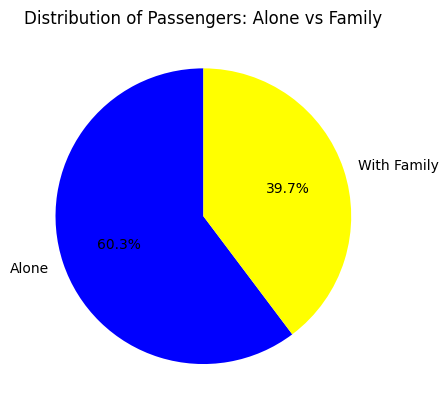

In [ ]:
alone_count_data = df['IsAlone'].value_counts()

categories = ['Alone', 'With Family']

plt.pie(
    alone_count_data,
    labels=categories,
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'yellow']
)

plt.title("Distribution of Passengers: Alone vs Family")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.2f}")

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       165
           1       0.74      0.73      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

ROC-AUC Score: 0.85


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, n_estimators=100)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
y_pred_proba_rfc = rfc.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rfc):.2f}")

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_proba_rfc)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.79      0.70      0.74       103

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

ROC-AUC Score: 0.86


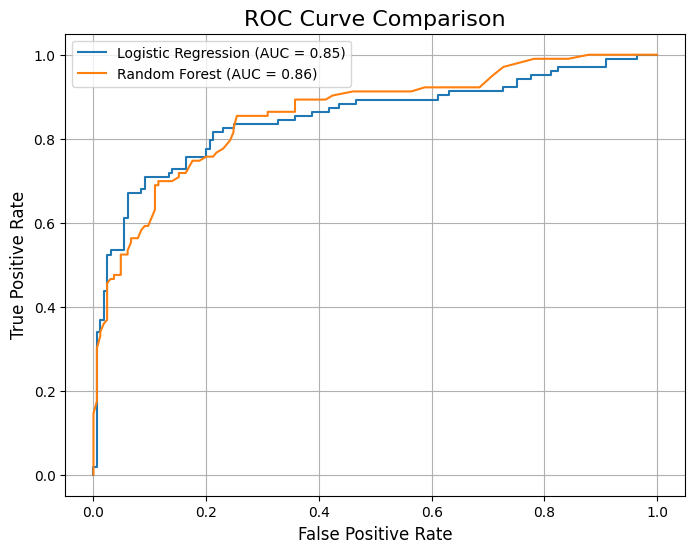

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_lr)))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_rfc)))

plt.title('ROC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

       Feature  Importance
2          Sex    0.250658
4         Fare    0.196010
0  PassengerId    0.195296
3          Age    0.179938
1       Pclass    0.080638
6   FamilySize    0.052326
5     Embarked    0.030225
7      IsAlone    0.014909


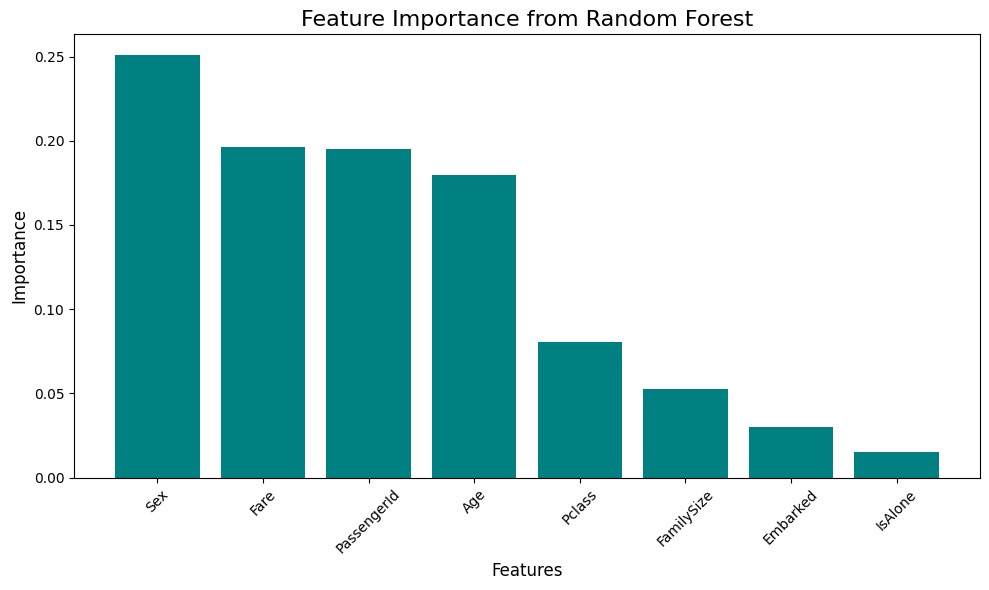

In [ ]:
import pandas as pd

feature_importances = pd.DataFrame({
    'Feature': df.drop(columns='Survived').columns,
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='teal')
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()